In [1]:
import torch
import numpy as np
import pandas as pd
from torch import nn
import cnn_utils
from sklearn import model_selection
import matplotlib.pyplot as plt

c:\Programy\anaconda3\envs\Torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

In [9]:
def load_data(filename, h, w):
    df = pd.read_csv(filename)
    X, y = cnn_utils.reshape_data_for_cnn(df, h, w)

    seed = 0
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)

    train_loader = cnn_utils.create_dataloader(X_train, y_train)
    val_loader = cnn_utils.create_dataloader(X_val, y_val)
    return train_loader, val_loader

In [21]:
train_loader, val_loader = load_data("Data\\train.csv", 28, 28)

## Neural network

### Setting device

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


### Model's definition
Simple convolutional neural net from: https://machinelearningmastery.com/handwritten-digit-recognition-with-lenet5-model-in-pytorch/

In [4]:

import torch
import torch.nn as nn
import torch.optim as optim
 
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1)
        self.dropout = nn.Dropout(0.2)
        self.flat = nn.Flatten()
        self.fc = nn.Linear(27*27*10, 128)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.relu1(self.conv(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = self.relu2(self.fc(self.flat(x)))
        x = self.output(x)
        return x

### Training process

In [19]:
def training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs):
    accs = []
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch.to(device))
            loss = loss_fn(y_pred, y_batch.to(device))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        acc = 0
        count = 0
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch.to(device))
            acc += (torch.argmax(y_pred, 1) == y_batch.to(device)).float().sum()
            count += len(y_batch)
        acc = acc / count
        print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))
        accs.append(acc.item())

    return accs

In [14]:
def plot_acc(accs: list) -> None:
    x = list(range(1, len(accs)+1))
    plt.plot(x, accs)

Epoch 0: model accuracy 93.60%
Epoch 1: model accuracy 96.42%
Epoch 2: model accuracy 96.52%
Epoch 3: model accuracy 97.21%
Epoch 4: model accuracy 97.30%
Epoch 5: model accuracy 97.46%
Epoch 6: model accuracy 97.45%
Epoch 7: model accuracy 97.36%
Epoch 8: model accuracy 97.40%
Epoch 9: model accuracy 97.23%
Epoch 10: model accuracy 97.58%
Epoch 11: model accuracy 97.55%
Epoch 12: model accuracy 97.29%
Epoch 13: model accuracy 97.51%
Epoch 14: model accuracy 97.45%
Epoch 15: model accuracy 97.69%
Epoch 16: model accuracy 97.51%
Epoch 17: model accuracy 97.11%
Epoch 18: model accuracy 97.40%
Epoch 19: model accuracy 97.56%


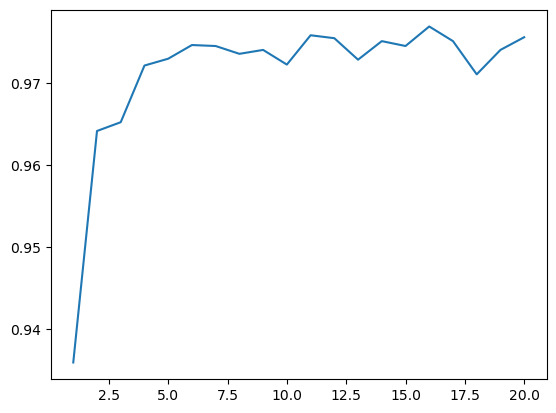

In [22]:
model = CNN()
model = model.to(device)
 
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 20

accs = training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs)
plot_acc(accs)

### Model with zoomed picture

In [15]:
train_loader, val_loader = load_data("Data\\train_zoomed.csv", 28, 28)

Epoch 0: model accuracy 94.95%
Epoch 1: model accuracy 96.42%
Epoch 2: model accuracy 96.70%
Epoch 3: model accuracy 97.35%
Epoch 4: model accuracy 97.38%
Epoch 5: model accuracy 97.42%
Epoch 6: model accuracy 97.30%
Epoch 7: model accuracy 97.54%
Epoch 8: model accuracy 97.44%
Epoch 9: model accuracy 97.27%
Epoch 10: model accuracy 97.50%
Epoch 11: model accuracy 97.63%
Epoch 12: model accuracy 97.88%
Epoch 13: model accuracy 97.37%
Epoch 14: model accuracy 97.56%
Epoch 15: model accuracy 96.83%
Epoch 16: model accuracy 97.59%
Epoch 17: model accuracy 97.79%
Epoch 18: model accuracy 97.51%
Epoch 19: model accuracy 97.15%


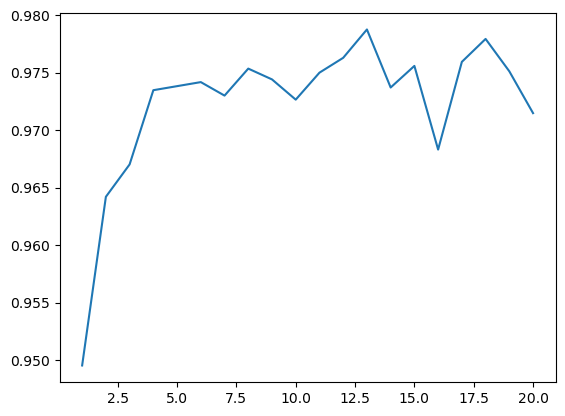

In [20]:
model = CNN()
model = model.to(device)
 
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 20

accs = training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs)
plot_acc(accs)